<a href="https://colab.research.google.com/github/salemprakash/FoDS-Fall-2025-26/blob/main/Module%202%20Sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Install and Load the Extension.
!pip -q install "ipython-sql>=0.5.0" "prettytable<3.10"
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [11]:
#Connect to a Database
%sql sqlite:////content/mydb2.db
%config SqlMagic.style = 'PLAIN_COLUMNS'

In [17]:
%%sql
CREATE TABLE IF NOT EXISTS employees (
  emp_id    INTEGER PRIMARY KEY,
  name      TEXT NOT NULL,
  dept      TEXT,
  salary    INTEGER
);

 * sqlite:////content/mydb2.db
Done.


[]

In [18]:
%%sql
INSERT INTO employees VALUES
(1,'Alice','Data Science',90000),
(2,'Bob','Analytics',78000),
(3,'Carol','Engineering',105000),
(4,'David','Analytics',82000),
(5,'Eve','Data Science',96000);

 * sqlite:////content/mydb2.db
5 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM employees ORDER BY emp_id;

 * sqlite:////content/mydb2.db
Done.


emp_id,name,dept,salary
1,Alice,Data Science,90000
2,Bob,Analytics,78000
3,Carol,Engineering,105000
4,David,Analytics,82000
5,Eve,Data Science,96000


#Basic Statistics with SQL

In [ ]:
#Create the table
%%sql
CREATE TABLE employees (
    salary INT,
    name VARCHAR(50)
);




In [ ]:
#Insert data into the table
%%sql
INSERT INTO employees (salary, name) VALUES (1000, 'Amit');
INSERT INTO employees (salary, name) VALUES (2000, 'Nisha');
INSERT INTO employees (salary, name) VALUES (3000, 'Yogesh');
INSERT INTO employees (salary, name) VALUES (4000, 'Puja');
INSERT INTO employees (salary, name) VALUES (9000, 'Ram');
INSERT INTO employees (salary, name) VALUES (7000, 'Husain');
INSERT INTO employees (salary, name) VALUES (8000, 'Risha');
INSERT INTO employees (salary, name) VALUES (5000, 'Anil');
INSERT INTO employees (salary, name) VALUES (10000, 'Kumar');
INSERT INTO employees (salary, name) VALUES (6000, 'Shiv');



In [ ]:
%%sql
Select * from employees;


In [ ]:
#Mean
%%sql
SELECT Avg(salary) as MEAN FROM   employees;

In [ ]:
#Mode
%%sql
SELECT salary
FROM employees
GROUP BY salary
ORDER BY COUNT(*) DESC
LIMIT 1;



In [ ]:
#Median - Suitable for SQL Lite
%%sql

WITH ordered AS (
  SELECT
    salary,
    ROW_NUMBER() OVER (ORDER BY salary) AS rn,
    COUNT(*) OVER () AS cnt
  FROM employees
  WHERE salary IS NOT NULL
)
SELECT AVG(salary) AS median_salary
FROM ordered
WHERE rn IN ((cnt + 1)/2, (cnt + 2)/2);

In [ ]:
#Median Suitable only in SQL SERVER
'''  #This syntax will only work in MS SQL SERVER not in SQL Lite
%%sql
SET @rindex := -1;
SELECT AVG(m.sal) FROM
	(SELECT @rindex:=@rindex + 1 AS rowindex, employees.salary AS sal
	FROM employees
	ORDER BY employees.salary) AS m
WHERE
m.rowindex IN (FLOOR(@rindex / 2) , CEIL(@rindex / 2));
'''

#Data Munging with SQL

In [ ]:
#UPPER
%%sql
SELECT UPPER(name) AS name FROM employees;

In [ ]:
#LOWER
%%sql
SELECT LOWER(name) AS name FROM employees;

In [ ]:
#TRIM
%%sql
SELECT TRIM(name) AS name FROM employees;

In [ ]:
#LTRIM
%%sql
SELECT LTRIM(name) AS name FROM employees;

In [ ]:
#RTRIM
%%sql
SELECT RTRIM(name) AS name FROM employees;

In [ ]:
#RIGHT - 2 charcter from right
%%sql
SELECT SUBSTR(name, -2) AS name FROM employees;

In [ ]:
#LEFT - For first 2 character from left name, starting position, ending position
%%sql
SELECT SUBSTR(name, 1, 2) AS name FROM employees;

In [ ]:
#REPLACE
%%sql
SELECT REPLACE(name, 'a', 'A') AS name FROM employees;

#Joins
* In SQL, joins are commands that are used to combine rows from two or more tables.
* These tables are combined based on a related column between those tables. Inner, left, right, and full are four basic types of SQL joins.
* Venn diagram is the easiest way to explain the difference between these four types.
* The result of joining two tables can be represented by the following Venn diagram

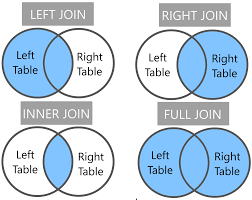




In [12]:
%%sql
--Emp Table
CREATE TABLE Emp (
    ID INT PRIMARY KEY,
    STATE VARCHAR(2)
);


 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) table Emp already exists
[SQL: --Emp Table
CREATE TABLE Emp (
    ID INT PRIMARY KEY,
    STATE VARCHAR(2)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [13]:
%%sql
--Insert in Emp table
INSERT INTO Emp (ID, STATE) VALUES
(10, 'AB'),
(11, 'AC'),
(12, 'AD');


 * sqlite:////content/mydb2.db
(sqlite3.IntegrityError) UNIQUE constraint failed: Emp.ID
[SQL: --Insert in Emp table
INSERT INTO Emp (ID, STATE) VALUES
(10, 'AB'),
(11, 'AC'),
(12, 'AD');]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [14]:
%%sql
--Dept Table
CREATE TABLE Dept (
    ID INT PRIMARY KEY,
    BRANCH VARCHAR(20)
);

--Insert into Dept Table
INSERT INTO Dept (ID, BRANCH) VALUES
(11, 'Computer'),
(12, 'Civil'),
(13, 'Mech');


 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) table Dept already exists
[SQL: --Dept Table
CREATE TABLE Dept (
    ID INT PRIMARY KEY,
    BRANCH VARCHAR(20)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [15]:
%%sql
SELECT * from Emp;



 * sqlite:////content/mydb2.db
Done.


ID,STATE
10,AB
11,AC
12,AD


In [ ]:
%%sql
SELECT * from Dept;

 * sqlite:////content/mydb2.db
Done.


ID,BRANCH
11,Computer
12,Civil
13,Mech


In [ ]:
#Inner Join
%%sql
SELECT *FROM Emp inner join Dept on Emp.ID = Dept.ID;


 * sqlite:////content/mydb2.db
Done.


ID,STATE,ID_1,BRANCH
11,AC,11,Computer
12,AD,12,Civil


In [ ]:
#Left Outer Join
%%sql
SELECT *FROM Emp left outer join Dept on Emp.ID = Dept.ID;


 * sqlite:////content/mydb2.db
Done.


ID,STATE,ID_1,BRANCH
10,AB,None,None
11,AC,11,Computer
12,AD,12,Civil


In [ ]:
#Right Outer Join - This is not supported here and will support in MS Sql Server
%%sql
SELECT * FROM Emp right outer join Dept on Emp.ID = Dept.ID;


 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT * FROM Emp right outer join Dept on Emp.ID = Dept.ID;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
#Full Outer Join - This is not supported here and will support in MS Sql Server
%%sql
SELECT *FROM Emp full outer join Dept on Emp.ID = Dept.ID;

 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT *FROM Emp full outer join Dept on Emp.ID = Dept.ID;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
#Cross Join
%%sql
SELECT *FROM Emp cross join Dept;

 * sqlite:////content/mydb2.db
Done.


ID,STATE,ID_1,BRANCH
10,AB,11,Computer
10,AB,12,Civil
10,AB,13,Mech
11,AC,11,Computer
11,AC,12,Civil
11,AC,13,Mech
12,AD,11,Computer
12,AD,12,Civil
12,AD,13,Mech


#Aggregation

In [19]:
#COUNT
%%sql
SELECT COUNT(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


COUNT(SALARY)
5


In [21]:
#AVERAGE
%%sql
SELECT AVG(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


AVG(SALARY)
90200.0


In [22]:
#SUM
%%sql
SELECT SUM(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


SUM(SALARY)
451000


In [23]:
#MIN
%%sql
SELECT MIN(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


MIN(SALARY)
78000


In [24]:
#MAX
%%sql
SELECT MAX(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


MAX(SALARY)
105000


#Preparing Data for Analytics Tool

In [ ]:
%%sql
--SALES TABLE
CREATE TABLE sales (
    sale_no INT PRIMARY KEY,
    product_id INT,
    quantity INT,
    price INT,
    customer_name VARCHAR(50)
);


 * sqlite:////content/mydb2.db
Done.


[]

In [ ]:
#INSERT RECORD INTO SALES TABLE
%%sql
INSERT INTO sales (sale_no, product_id, quantity, price, customer_name) VALUES
(5001, 3, 4, 21000, 'John'),
(5002, 11, NULL, 17000, 'Anna'),
(5003, 94, 10, 105000, 'Tom'),
(5004, 86, 8, 27000, 'Nora'),
(5005, 88, 18, 8000, 'Tom');



 * sqlite:////content/mydb2.db
5 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM SALES;

 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price,customer_name
5001,3,4,21000,John
5002,11,None,17000,Anna
5003,94,10,105000,Tom
5004,86,8,27000,Nora
5005,88,18,8000,Tom


In [ ]:
#CASE
%%sql
SELECT *,
	CASE	 WHEN quantity >= 10 THEN 'More'
			WHEN quantity >= 6 THEN 'Avg'
			ELSE 'Less'
	END AS summary
FROM sales;


 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price,customer_name,summary
5001,3,4,21000,John,Less
5002,11,None,17000,Anna,Less
5003,94,10,105000,Tom,More
5004,86,8,27000,Nora,Avg
5005,88,18,8000,Tom,More


In [ ]:
#COALESCE
%%sql
SELECT customer_name, product_id,
COALESCE(quantity, -1) AS quantity
FROM sales;




 * sqlite:////content/mydb2.db
Done.


customer_name,product_id,quantity
John,3,4
Anna,11,-1
Tom,94,10
Nora,86,8
Tom,88,18


In [ ]:
#NULLIF
%%sql
SELECT sale_no, customer_name,
NULLIF(product_id, 11) AS product_id
FROM sales;


 * sqlite:////content/mydb2.db
Done.


sale_no,customer_name,product_id
5001,John,3
5002,Anna,None
5003,Tom,94
5004,Nora,86
5005,Tom,88


In [ ]:
#LEAST
%%sql
SELECT sale_no, product_id, quantity,
MAX(10000, price) as price FROM sales;


 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price
5001,3,4,21000
5002,11,None,17000
5003,94,10,105000
5004,86,8,27000
5005,88,18,10000


In [ ]:
#GREATEST
%%sql

SELECT sale_no, product_id, quantity,
MIN(10000, price) as price
FROM sales;

 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price
5001,3,4,10000
5002,11,None,10000
5003,94,10,10000
5004,86,8,10000
5005,88,18,8000


In [ ]:
%%sql
SELECT DISTINCT customer_name FROM sales;


 * sqlite:////content/mydb2.db
Done.


customer_name
John
Anna
Tom
Nora
